In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [54]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [55]:
# Display the first few rows
display(df.head())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
# Selecting relevant features: 'Annual Income' and 'Spending Score'
X = df.iloc[:, [3, 4]].values

In [57]:
# Elbow Method to determine optimal k (number of clusters)
wcss = [] 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42) 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

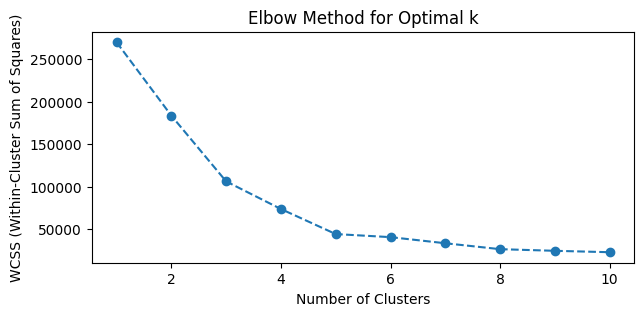

In [58]:
# Plot Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(7, 3)) 
plt.plot(range(1, 11), wcss, marker='o', linestyle='--') 
plt.xlabel("Number of Clusters") 
plt.ylabel("WCSS (Within-Cluster Sum of Squares)") 
plt.title("Elbow Method for Optimal k") 
plt.show()

In [59]:
# Based on the Elbow method, optimal k value is 5
optimal_k = 5

In [60]:
# Apply K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42) 
y_kmeans = kmeans.fit_predict(X)

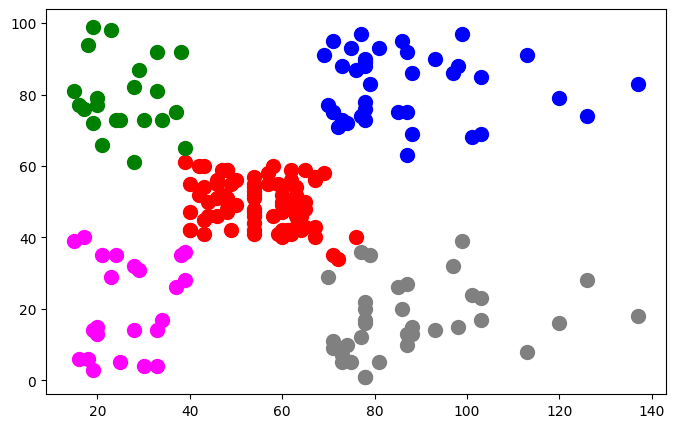

In [61]:
# Scatter plot of the clusters with centroids
plt.figure(figsize=(8, 5)) 
colors = ['red', 'blue', 'green', 'grey', 'magenta'] 
for i in range(optimal_k): 
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

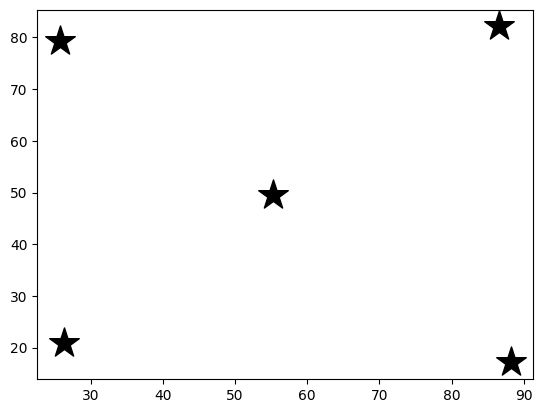

In [62]:
# Add centroids to the same scatter plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=500, c='black', marker='*', label='Centroids')